In [3]:
# load python libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Input Dataset
alzheimer = pd.read_csv("C://Users//Asus//OneDrive//Documents//UPN//Perkuliahan//Semester 3//Analisis Data Eksploratif//Tugas Kelompok//alzheimers_disease_data.csv")
alzheimer.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [5]:
alzheimer.shape

(2149, 35)

In [6]:
total = alzheimer.isnull().sum().sort_values(ascending=False)
total

PatientID                    0
BehavioralProblems           0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
ADL                          0
DiastolicBP                  0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfulness                0
Diagnosis                    0
CholesterolTotal             0
SystolicBP                   0
Age                          0
PhysicalActivity             0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
DietQuality                  0
Hypertension                 0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depressi

In [7]:
alzheimer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [47]:
selected_columns = [
    'Age',
    'MMSE',
    'FamilyHistoryAlzheimers',
    'MemoryComplaints',
    'ADL',
    'Confusion',
    'Forgetfulness',
    'EducationLevel',
    'PhysicalActivity',
    'CholesterolTotal',
    'Hypertension',
    'Diabetes',
    'Depression',
    'Gender',
    'Diagnosis'
]

# Membuat DataFrame baru 
data_cleaned = alzheimer[selected_columns]

# menimpa DataFrame asli
data_cleaned = alzheimer[selected_columns]
data_cleaned.head()

,Age,MMSE,FamilyHistoryAlzheimers,MemoryComplaints,ADL,Confusion,Forgetfulness,EducationLevel,PhysicalActivity,CholesterolTotal,Hypertension,Diabetes,Depression,Gender,Diagnosis
0,73,21.463532,0,0,1.725883,0,0,2,6.327112,242.366840,0,1,1,0,0
1,89,20.613267,0,0,2.592424,0,1,0,7.619885,231.162595,0,0,0,0,0
2,73,7.356249,1,0,7.119548,0,0,1,7.844988,284.181858,0,0,0,0,0
3,74,13.991127,0,0,6.481226,0,0,1,8.428001,159.582240,0,0,0,1,0
4,89,13.517609,0,0,0.014691,0,0,0,6.310461,237.602184,0,0,0,0,0


In [55]:
# Cek ada null atau nilai tidak valid pada Gender dan Diagnosis
data_cleaned = data_cleaned.dropna(subset=['Gender', 'Diagnosis'])
data_cleaned['Gender'] = data_cleaned['Gender'].astype(int)

# Persentase wanita yang di diagnosis alzeimer
women = data_cleaned.loc[data_cleaned.Gender == 1, 'Diagnosis']
rate_women = sum(women) / len(women) * 100 

# Persentase pria yang di diagnosis alzeimer  
men = data_cleaned.loc[data_cleaned.Gender == 0, 'Diagnosis']
rate_men = sum(men) / len(men) * 100

print(f"{rate_women:.2f}% of women Diagnosed.")
print(f"{rate_men:.2f}% of men Diagnosed.")

34.38% of women Diagnosed.
36.38% of men Diagnosed.


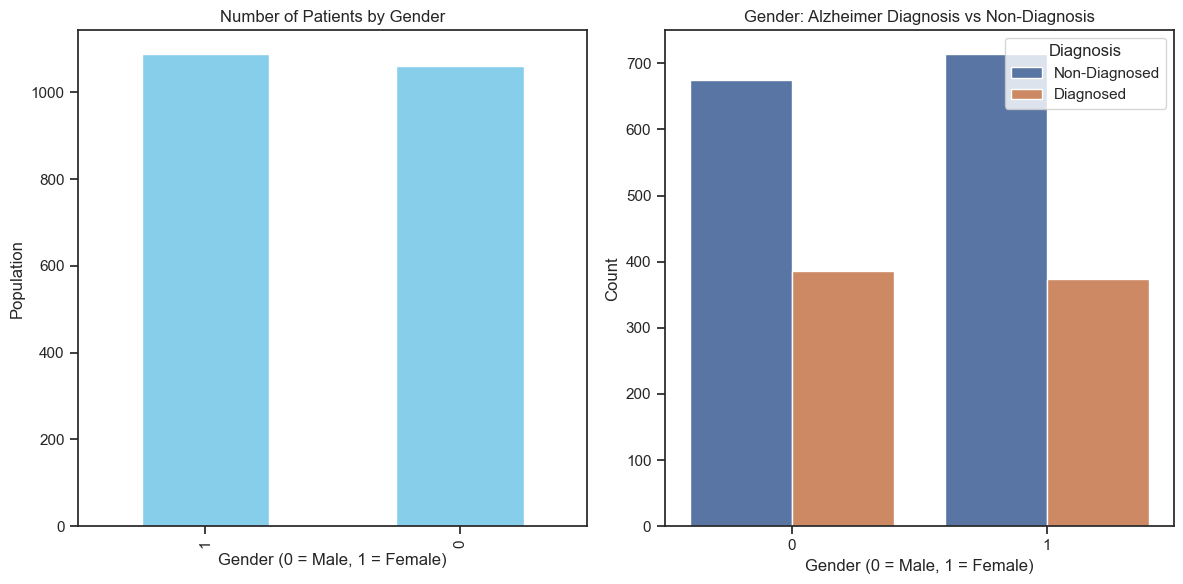

In [49]:
# Initialize subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# plot 1: Jumlah pasien berdasarkan gender
data_cleaned["Gender"].value_counts().plot.bar(color="skyblue", ax=ax[0])
ax[0].set_title("Number of Patients by Gender")
ax[0].set_xlabel("Gender (0 = Male, 1 = Female)")
ax[0].set_ylabel("Population")

# plot 2: Diagnosis berdasarkan gender (stacked bar plot showing diagnosis status)
sns.countplot(x="Gender", hue="Diagnosis", data=data_cleaned, ax=ax[1])
ax[1].set_title("Gender: Alzheimer Diagnosis vs Non-Diagnosis")
ax[1].set_xlabel("Gender (0 = Male, 1 = Female)")
ax[1].set_ylabel("Count")
ax[1].legend(title="Diagnosis", labels=["Non-Diagnosed", "Diagnosed"])

plt.tight_layout()
plt.show()

In [50]:
# Filter pasien yang terjangkit Alzheimer (Diagnosis=1)
alzheimer_cases = data_cleaned[data_cleaned['Diagnosis'] == 1]['FamilyHistoryAlzheimers'].value_counts()
print("Jumlah penderita Alzheimer berdasarkan family history:")
print(f"Have some Family History (1): {alzheimer_cases.get(1, 0)} pasien")
print(f"Not Have some Family History (0): {alzheimer_cases.get(0, 0)} pasien")

Jumlah penderita Alzheimer berdasarkan family history:
Have some Family History (1): 177 pasien
Not Have some Family History (0): 583 pasien


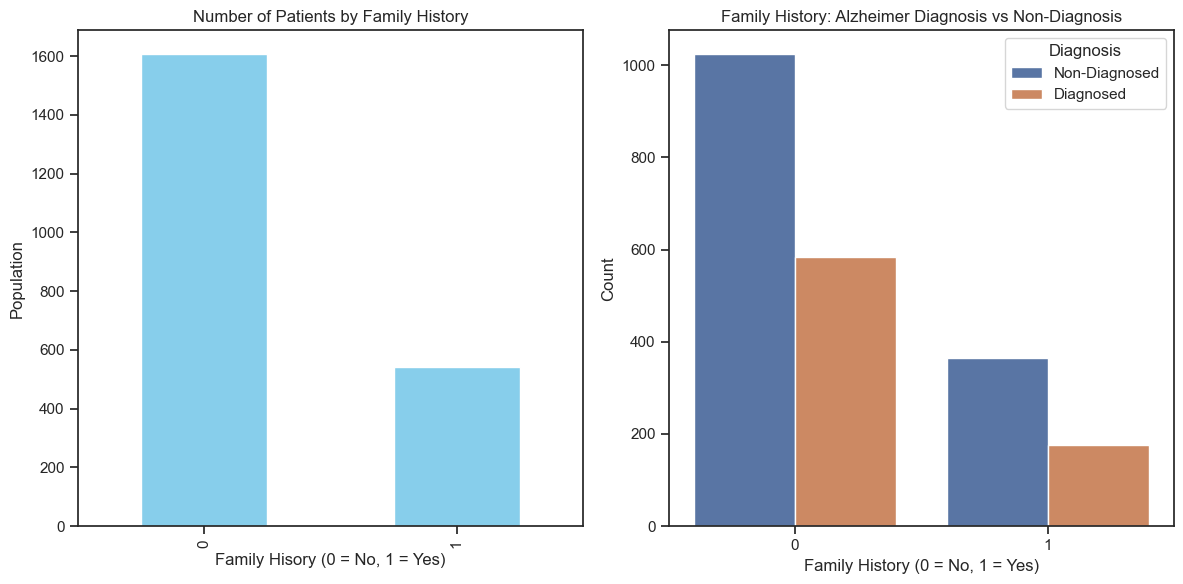

In [51]:
# Initialize subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# First plot: Count of patients by Family History
data_cleaned["FamilyHistoryAlzheimers"].value_counts().plot.bar(color="skyblue", ax=ax[0])
ax[0].set_title("Number of Patients by Family History")
ax[0].set_xlabel("Family Hisory (0 = No, 1 = Yes)")
ax[0].set_ylabel("Population")

# Second plot: Diagnosis by gender (stacked bar plot showing diagnosis status)
sns.countplot(x="FamilyHistoryAlzheimers", hue="Diagnosis", data=data_cleaned, ax=ax[1])
ax[1].set_title("Family History: Alzheimer Diagnosis vs Non-Diagnosis")
ax[1].set_xlabel("Family History (0 = No, 1 = Yes)")
ax[1].set_ylabel("Count")
ax[1].legend(title="Diagnosis", labels=["Non-Diagnosed", "Diagnosed"])

plt.tight_layout()
plt.show()

<Axes: xlabel='CholesterolTotal', ylabel='Count'>

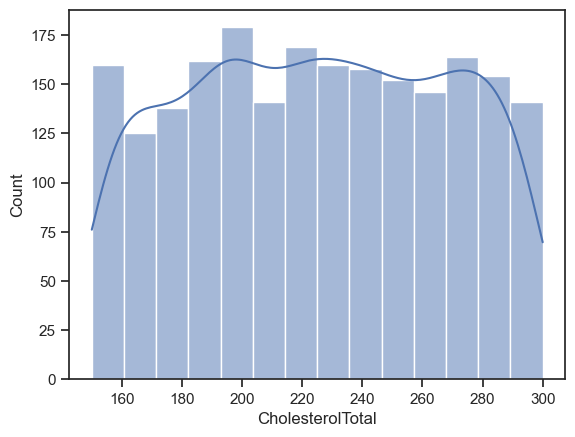

In [52]:
sns.histplot(data=data_cleaned, x="CholesterolTotal", kde=True)

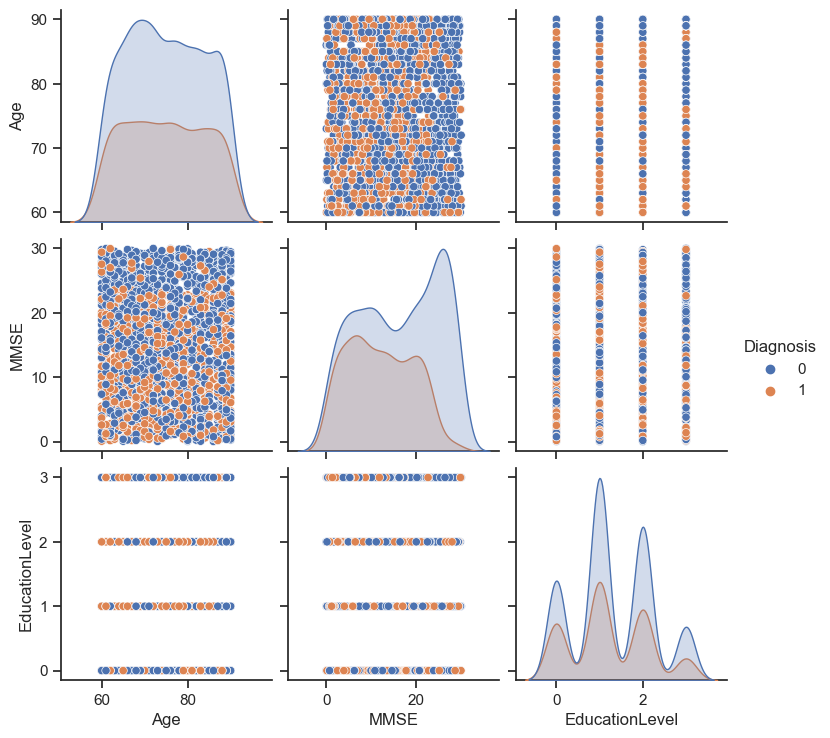

In [53]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(data_cleaned,vars = [ 'Age','MMSE','EducationLevel'],hue="Diagnosis")
plt.show()

In [56]:
data_cleaned['Diagnosis'] = data_cleaned['Diagnosis']
Tcorrelation = data_cleaned.corr(method='pearson')
Tcorrelation

,Age,MMSE,FamilyHistoryAlzheimers,MemoryComplaints,ADL,Confusion,Forgetfulness,EducationLevel,PhysicalActivity,CholesterolTotal,Hypertension,Diabetes,Depression,Gender,Diagnosis
Age,1.000000,-0.004235,-0.018784,0.012343,-0.038658,0.009002,-0.019279,-0.060560,-0.010249,0.000392,0.003954,-0.005708,-0.008752,0.028708,-0.005488
MMSE,-0.004235,1.000000,0.015575,0.007652,0.003359,0.003763,0.011848,0.026090,-0.008342,-0.013638,0.012079,-0.008905,0.014020,0.025330,-0.237126
FamilyHistoryAlzheimers,-0.018784,0.015575,1.000000,-0.028348,0.014041,0.017976,0.022339,0.032748,-0.014106,0.007054,0.012920,-0.023106,0.000796,0.018421,-0.032900
MemoryComplaints,0.012343,0.007652,-0.028348,1.000000,-0.037511,-0.007749,-0.006961,-0.000165,0.008709,0.013821,-0.021130,-0.017280,-0.019039,0.003880,0.306742
ADL,-0.038658,0.003359,0.014041,-0.037511,1.000000,0.012373,-0.002595,0.031934,-0.013324,0.000775,-0.018602,0.022235,0.006195,0.003865,-0.332346
Confusion,0.009002,0.003763,0.017976,-0.007749,0.012373,1.000000,0.010100,-0.008168,-0.009397,0.037390,-0.008634,-0.004793,0.001593,-0.030583,-0.019186
Forgetfulness,-0.019279,0.011848,0.022339,-0.006961,-0.002595,0.010100,1.000000,-0.008685,0.009837,-0.025326,0.029931,-0.007644,0.017822,-0.028537,-0.000354
EducationLevel,-0.060560,0.026090,0.032748,-0.000165,0.031934,-0.008168,-0.008685,1.000000,-0.016703,-0.041598,-0.016950,0.003059,0.027573,-0.007070,-0.043966
PhysicalActivity,-0.010249,-0.008342,-0.014106,0.008709,-0.013324,-0.009397,0.009837,-0.016703,1.000000,0.014335,0.022081,0.029880,-0.013533,-0.035795,0.005945
CholesterolTotal,0.000392,-0.013638,0.007054,0.013821,0.000775,0.037390,-0.025326,-0.041598,0.014335,1.000000,-0.024493,0.048767,-0.010087,-0.009568,0.006394


<Axes: >

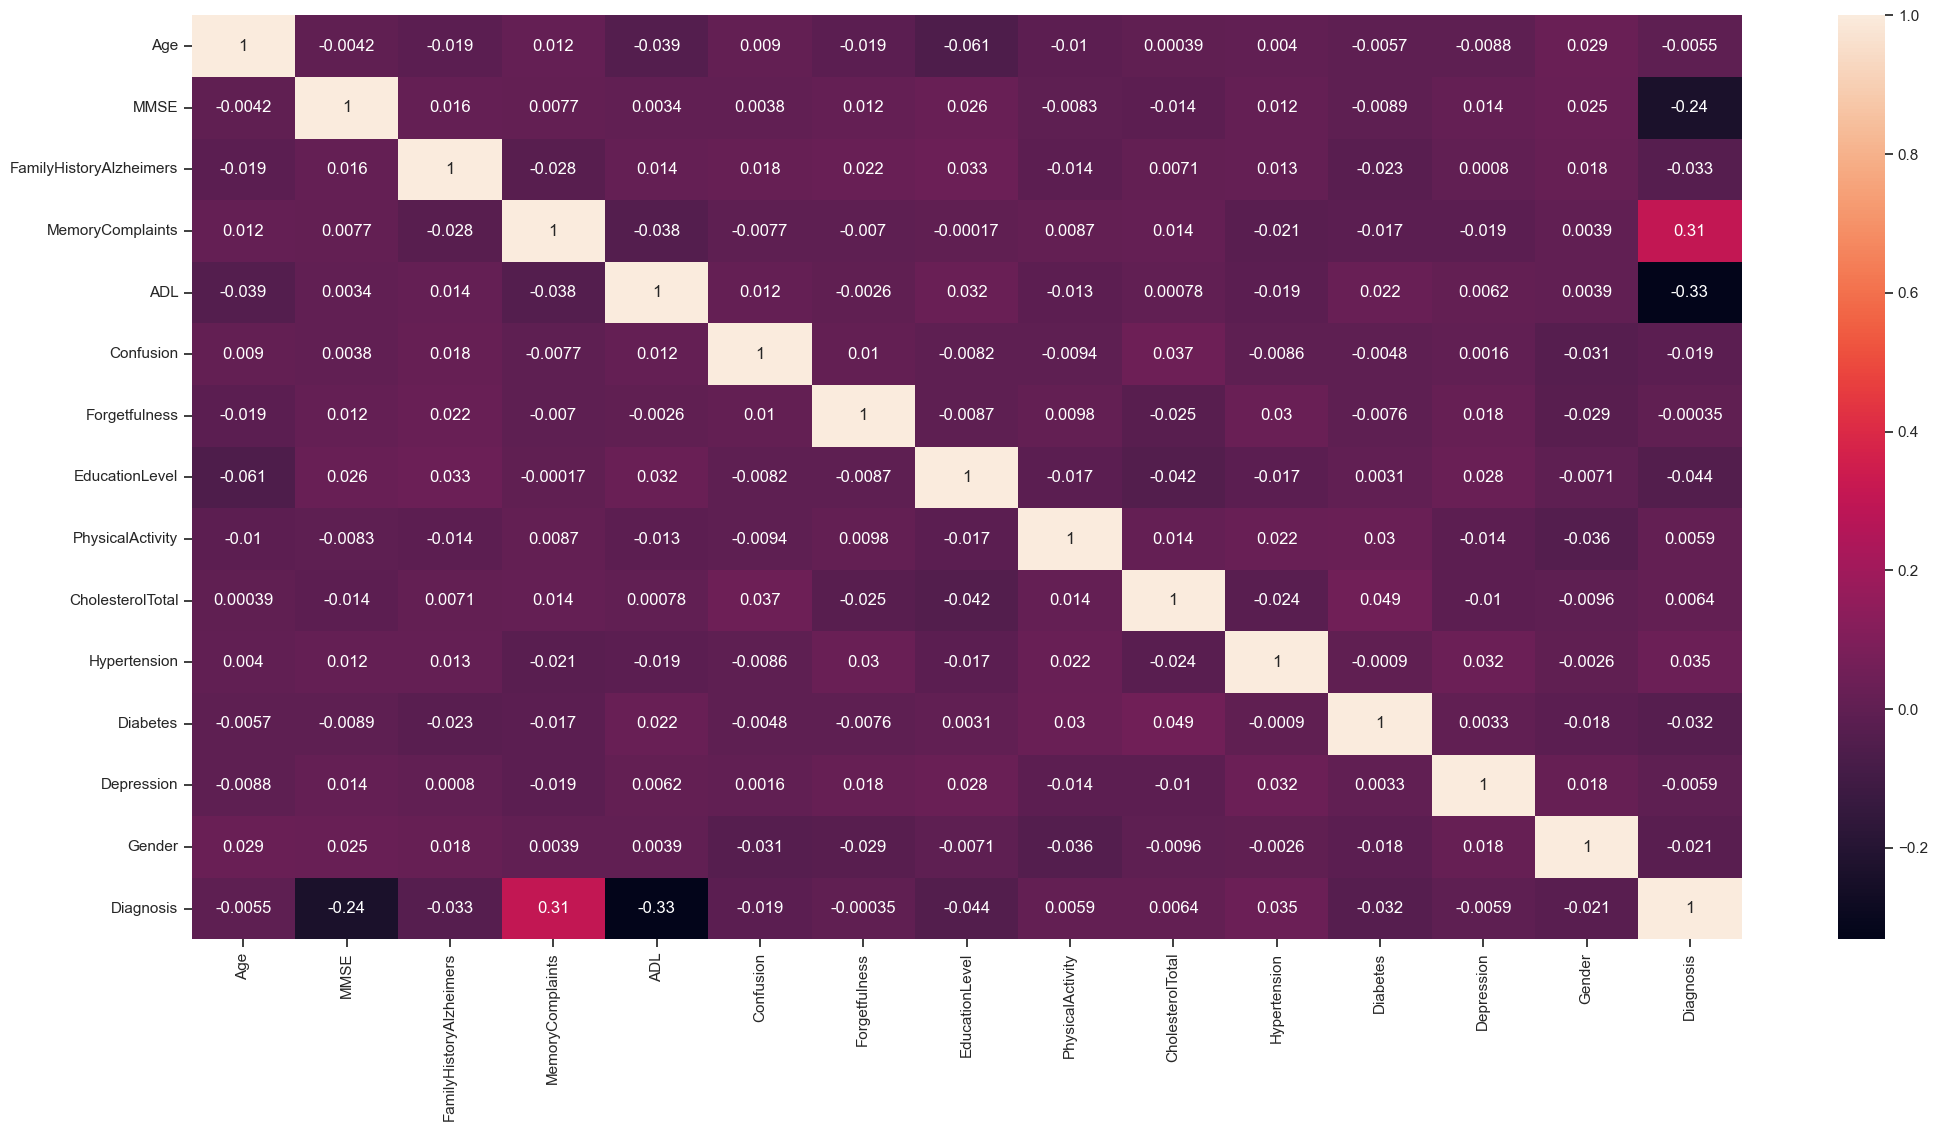

In [57]:
# Korelasi Antar Vaiabel
corr= data_cleaned.corr()
plt.figure(figsize=(25,12))
sns.heatmap(corr,annot=True)